Problem - 1:

# Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/Assignment/WHR-2024-5CS037.csv"
df = pd.read_csv(file_path)

print("First 10 rows of the dataset:")
df.head(10)


First 10 rows of the dataset:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
# Identify the number of rows and columns
print("\n Number of rows and columns in the dataset:",df.shape)



 Number of rows and columns in the dataset: (143, 9)


In [ ]:
# List all columns and their data types
print("\n Columns and their data types:")
df.dtypes


 Columns and their data types:


,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


# Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [ ]:
# Calculate mean, median, and standard deviation for the score column
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()

print(f"\nMean of score: {mean_score}")
print(f"Median of score: {median_score}")
print(f"Standard Deviation of score: {std_score}")

# Identify countries with the highest and lowest happiness scores
HighestScoreCountry = df[df['score'] == df['score'].max()]
LowestScoreCountry = df[df['score'] == df['score'].min()]

print("\nCountry with the highest happiness score:")
print(HighestScoreCountry[['Country name']])

print("\nCountry with the lowest happiness score:")
print(LowestScoreCountry[['Country name']])



Mean of score: 5.52758041958042
Median of score: 5.785
Standard Deviation of score: 1.1707165099442995

Country with the highest happiness score:
  Country name
0      Finland

Country with the lowest happiness score:
    Country name
142  Afghanistan


# Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())



Missing values in the dataset:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


# Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [ ]:
# Filter countries with 'score' > 7.5
filtered_df = df[df['score'] > 7.5]

# Sort by 'Log GDP per capita' (descending) and show top 10 rows
sorted_filtered_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)

print("\nTop 10 countries with 'score' > 7.5, sorted by 'Log GDP per capita':")
sorted_filtered_df.head(10)




Top 10 countries with 'score' > 7.5, sorted by 'Log GDP per capita':


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [ ]:
def Happiness_Category(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

df['Happiness Category'] = df['score'].apply(Happiness_Category)
print("\nHappiness_Category Added Successfully:")
df[['Country name', 'score', 'Happiness Category']].head()



Happiness_Category Added Successfully:


,Country name,score,Happiness Category
0,Finland,7.741,High
1,Denmark,7.583,High
2,Iceland,7.525,High
3,Sweden,7.344,High
4,Israel,7.341,High


2. Data Visualizations:


# Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

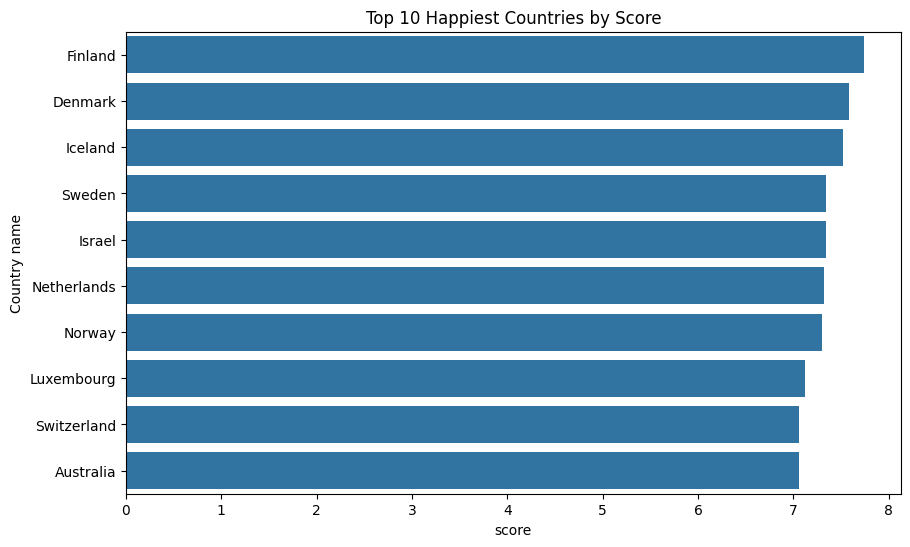

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 happiest countries
top_10_happiest = df.nlargest(10, 'score')

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_happiest, x='score', y='Country name', hue = 'Countries')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('score')
plt.ylabel('Country name')
plt.show()


#Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

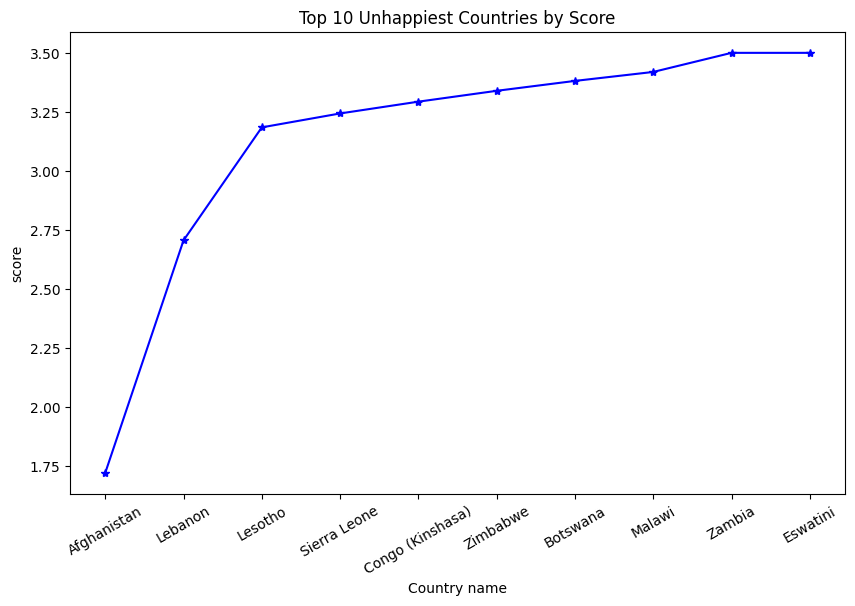

In [ ]:
# Top 10 unhappiest countries
top_10_unhappiest = df.nsmallest(10, 'score')

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='*', linestyle='-', color='blue')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country name')
plt.ylabel('score')
plt.xticks(rotation=30)
plt.show()


#Plot a histogram for the Score column to show its distribution and also interpret.

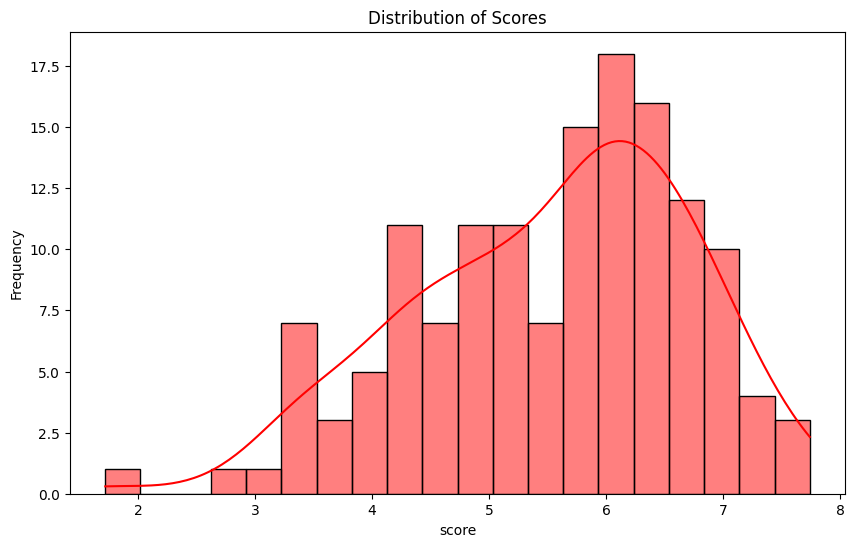

In [ ]:
# Histogram for the Score column
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], kde=True, color='red', bins=20)
plt.title('Distribution of Scores')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()


#Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

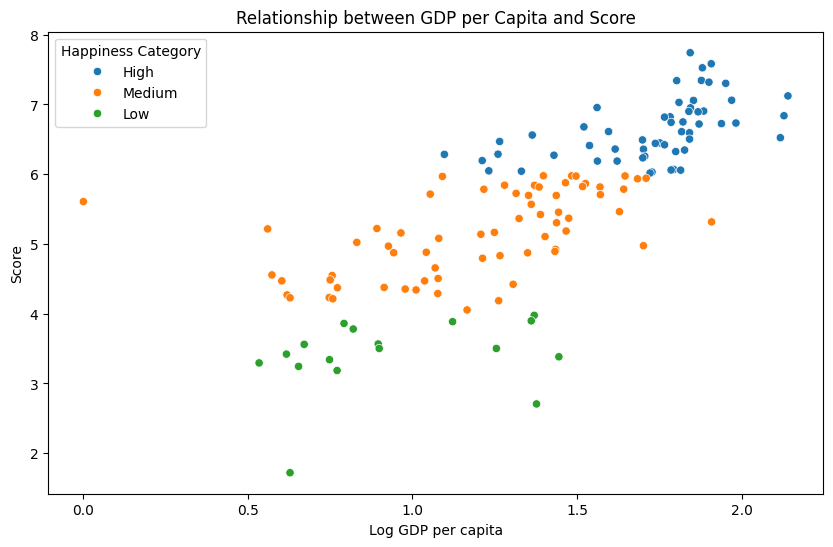

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Log GDP per capita', y='score', hue='Happiness Category')
plt.title('Relationship between GDP per Capita and Score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.show()


Problem - 2 - Some Advance Data Exploration Task:

#Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
# Define South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter South Asia dataset
south_asia_df = df[df['Country name'].isin(south_asian_countries)]
south_asia_df.to_csv("South_Asia_Dataset.csv", index=False)  # Save to CSV
print("South Asia Dataset saved!")


South Asia Dataset saved!


# Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy

In [ ]:
# Calculate 'Composite Score'
south_asia_df['Composite Score'] = (
    0.4 * south_asia_df['Log GDP per capita'] +
    0.3 * south_asia_df['Social support'] +
    0.3 * south_asia_df['Healthy life expectancy']
)
print("\nComposite Score column added successfully:")
south_asia_df[['Country name', 'Composite Score']].head()



Composite Score column added successfully:


,Country name,Composite Score
92,Nepal,0.8159
107,Pakistan,0.7039
125,India,0.7874
127,Sri Lanka,1.0739
128,Bangladesh,0.6774


2. Rank the South Asian countries based on the Composite Score in descending order.

In [ ]:
# Rank countries by 'Composite Score'
ranked_south_asia = south_asia_df.sort_values(by='Composite Score', ascending=False)
print("\nSouth Asian countries ranked by 'Composite Score':")
ranked_south_asia[['Country name', 'Composite Score']]



South Asian countries ranked by 'Composite Score':


,Country name,Composite Score
127,Sri Lanka,1.0739
92,Nepal,0.8159
125,India,0.7874
107,Pakistan,0.7039
128,Bangladesh,0.6774
142,Afghanistan,0.3238


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

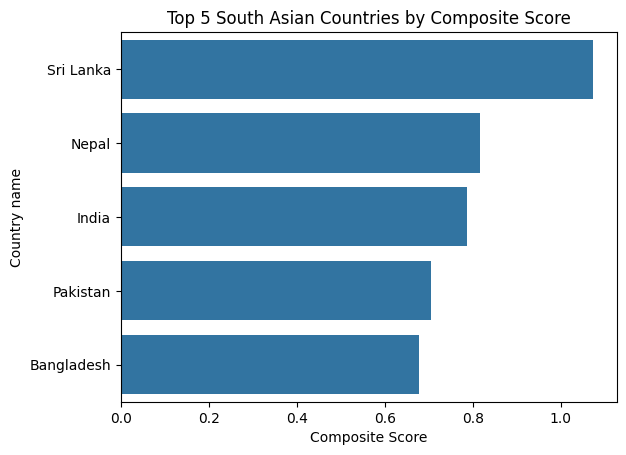

In [ ]:
top_5 = ranked_south_asia.head(5)
sns.barplot(data=top_5, x='Composite Score', y='Country name')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country name')
plt.show()


4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.


Countries ranked by Composite Score:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774

Countries ranked by Original Score:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
127    Sri Lanka  3.898
128   Bangladesh  3.886


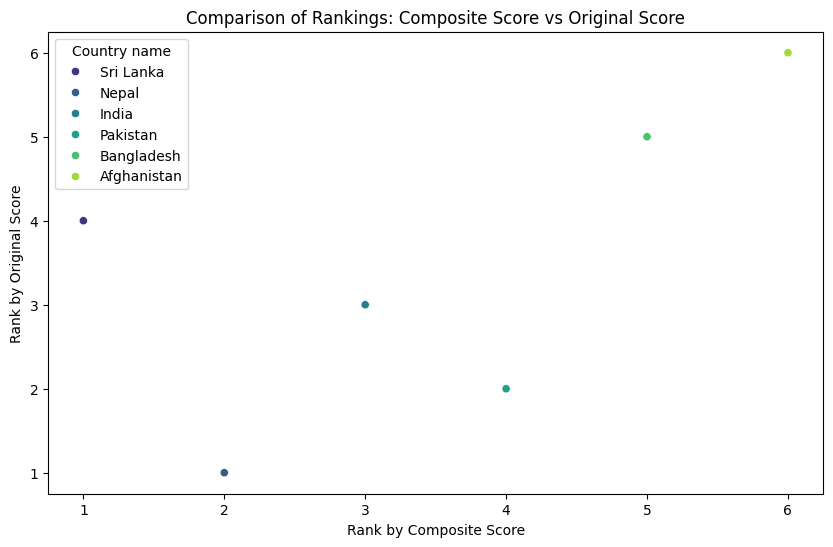

In [ ]:
comparison_df = ranked_south_asia[['Country name', 'Composite Score', 'score']].copy()

comparison_df_original = comparison_df.sort_values(by='score', ascending=False)

print("\nCountries ranked by Composite Score:")
print(comparison_df[['Country name', 'Composite Score']].head(5))

print("\nCountries ranked by Original Score:")
print(comparison_df_original[['Country name', 'score']].head(5))

comparison_df['Rank by Composite'] = comparison_df['Composite Score'].rank(ascending=False)
comparison_df['Rank by Original Score'] = comparison_df['score'].rank(ascending=False)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_df, x='Rank by Composite', y='Rank by Original Score', hue='Country name', palette='viridis')
plt.title('Comparison of Rankings: Composite Score vs Original Score')
plt.xlabel('Rank by Composite Score')
plt.ylabel('Rank by Original Score')
plt.show()


#Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.


Outliers based on score:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


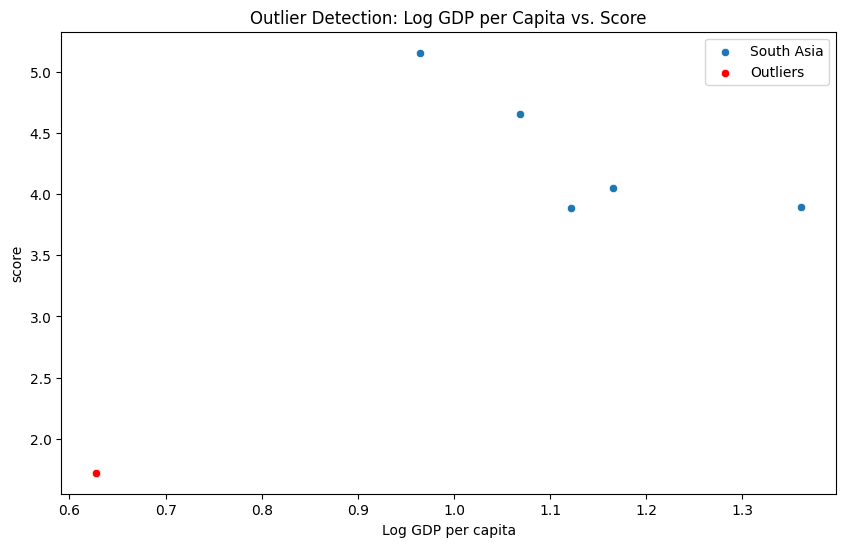

In [ ]:
# Define outliers using 1.5 * IQR rule
Q1 = south_asia_df['score'].quantile(0.25)
Q3 = south_asia_df['score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = south_asia_df[(south_asia_df['score'] < lower_bound) | (south_asia_df['score'] > upper_bound)]
print("\nOutliers based on score:")
print(outliers[['Country name', 'score','Log GDP per capita']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=south_asia_df, x='Log GDP per capita', y='score', label="South Asia")
sns.scatterplot(data=outliers, x='Log GDP per capita', y='score', color='red', label="Outliers")
plt.title("Outlier Detection: Log GDP per Capita vs. Score")
plt.legend()
plt.show()


#Task - 4 - Exploring Trends Across Metrics:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.



Correlations of metrics with Happiness Score (Pearson):
Freedom to make life choices: 0.80
Generosity: 0.87

Strongest relationship: Generosity (Correlation: 0.87)
Weakest relationship: Freedom to make life choices (Correlation: 0.80)


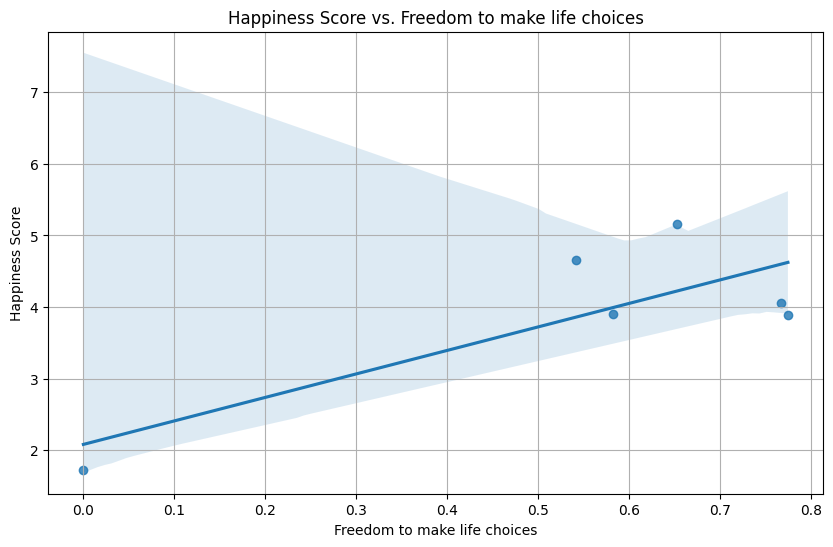

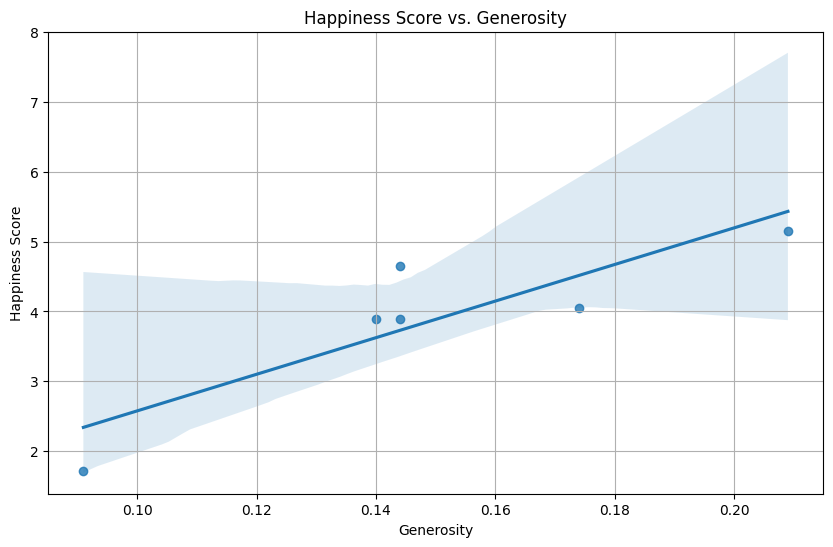

In [ ]:
metrics = ['Freedom to make life choices', 'Generosity']

correlations = {metric: south_asia_df[metric].corr(south_asia_df['score']) for metric in metrics}

print("\nCorrelations of metrics with Happiness Score (Pearson):")
for metric, corr in correlations.items():
    print(f"{metric}: {corr:.2f}")

# the strongest and weakest relationships
strongest_metric = max(correlations, key=correlations.get)
weakest_metric = min(correlations, key=correlations.get)
print(f"\nStrongest relationship: {strongest_metric} (Correlation: {correlations[strongest_metric]:.2f})")
print(f"Weakest relationship: {weakest_metric} (Correlation: {correlations[weakest_metric]:.2f})")

#scatter plots with trendlines
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.regplot(data=south_asia_df, x=metric, y='score')
    plt.title(f"Happiness  vs. {metric}")
    plt.xlabel(metric)
    plt.ylabel("Happiness ")
    plt.grid(True)
    plt.show()


#Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.


South Asian countries ranked by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093

South Asian countries ranked by GDP-Score Gap (Descending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


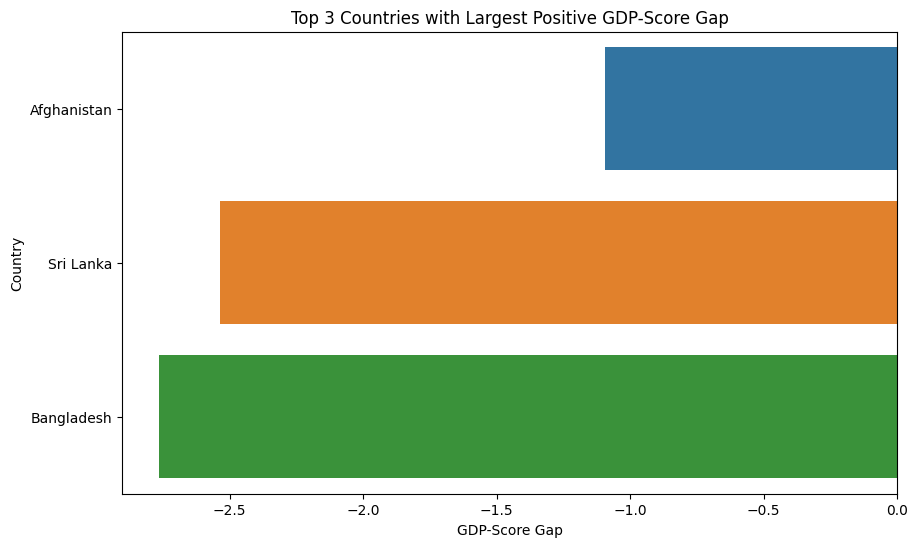

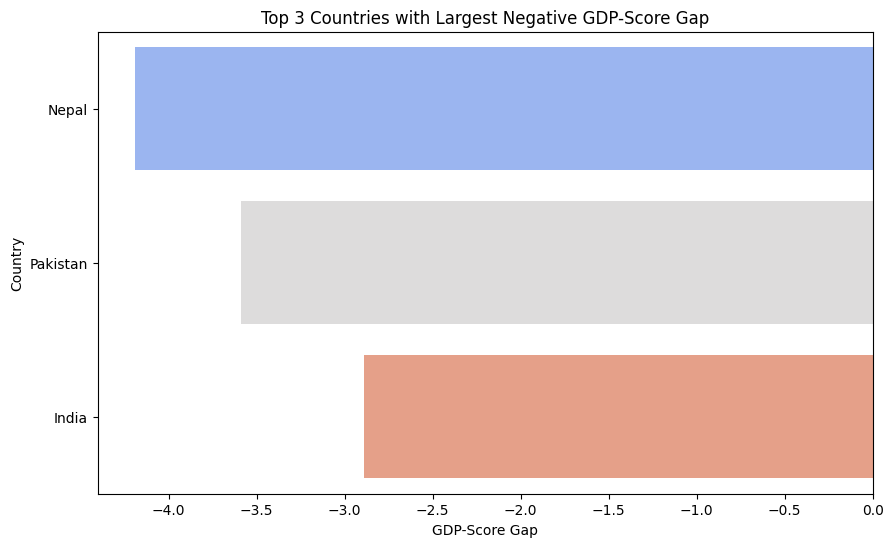

In [ ]:

south_asia_df.loc[:, 'GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

ascending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

print("\nSouth Asian countries ranked by GDP-Score Gap (Ascending):")
print(ascending_gap[['Country name', 'GDP-Score Gap']])

print("\nSouth Asian countries ranked by GDP-Score Gap (Descending):")
print(descending_gap[['Country name', 'GDP-Score Gap']])

# 3 countries with largest positive and negative gaps
top_3_positive_gap = descending_gap.head(3)
top_3_negative_gap = ascending_gap.head(3)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_3_positive_gap, x='GDP-Score Gap', y='Country name', hue='Country name', dodge=False, legend=False)
plt.title("Top 3 Countries with Largest Positive GDP-Score Gap")
plt.xlabel("GDP-Score Gap")
plt.ylabel("Country")
plt.show()

#for negative
plt.figure(figsize=(10, 6))
sns.barplot(data=top_3_negative_gap, x='GDP-Score Gap', y='Country name', palette='coolwarm', hue='Country name', dodge=False, legend=False)
plt.title("Top 3 Countries with Largest Negative GDP-Score Gap")
plt.xlabel("GDP-Score Gap")
plt.ylabel("Country")
plt.show()



Problem - 3 - Comparative Analysis:

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

In [ ]:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon",
    "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]

middle_east_df.to_csv('/content/middle_east_dataset.csv', index=False)
print("\nMiddle Eastern dataset saved as 'middle_east_dataset.csv'.")



Middle Eastern dataset saved as 'middle_east_dataset.csv'.


1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [ ]:
south_asia_stats = south_asia_df['score'].agg(['mean', 'std'])
middle_east_stats = middle_east_df['score'].agg(['mean', 'std'])

print("\nDescriptive Statistics for South Asia:")
print(south_asia_stats)

print("\nDescriptive Statistics for Middle East:")
print(middle_east_stats)

if south_asia_stats['mean'] > middle_east_stats['mean']:
    print("\nSouth Asia has higher happiness scores on average.")
else:
    print("\nMiddle East has higher happiness scores on average.")



Descriptive Statistics for South Asia:
mean    3.895667
std     1.177069
Name: score, dtype: float64

Descriptive Statistics for Middle East:
mean    5.412100
std     1.566201
Name: score, dtype: float64

Middle East has higher happiness scores on average.


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.

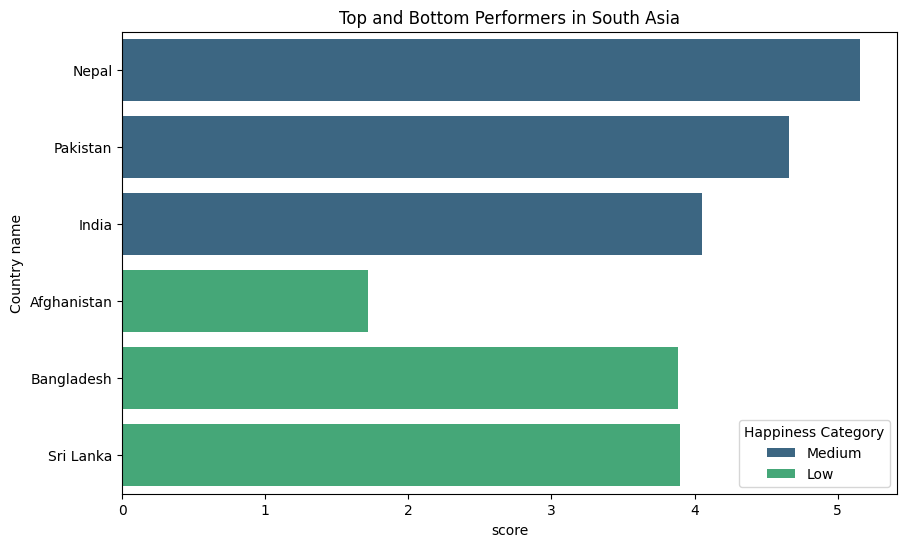

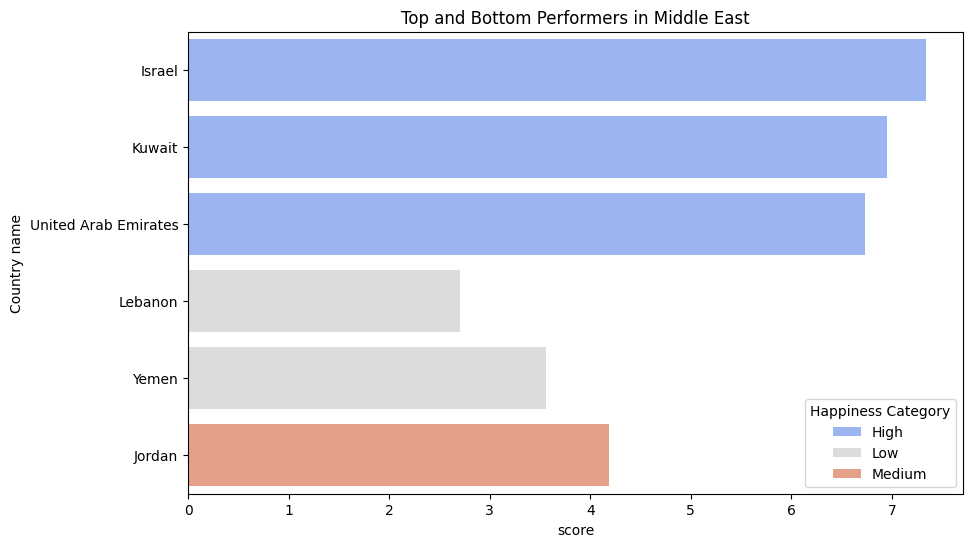

In [ ]:
south_asia_top3 = south_asia_df.nlargest(3, 'score')
south_asia_bottom3 = south_asia_df.nsmallest(3, 'score')

middle_east_top3 = middle_east_df.nlargest(3, 'score')
middle_east_bottom3 = middle_east_df.nsmallest(3, 'score')

plt.figure(figsize=(10, 6))
sns.barplot(data=pd.concat([south_asia_top3, south_asia_bottom3]), x='score', y='Country name', hue='Happiness Category', palette='viridis')
plt.title("Top and Bottom Performers in South Asia")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=pd.concat([middle_east_top3, middle_east_bottom3]), x='score', y='Country name', hue='Happiness Category', palette='coolwarm')
plt.title("Top and Bottom Performers in Middle East")
plt.show()


3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

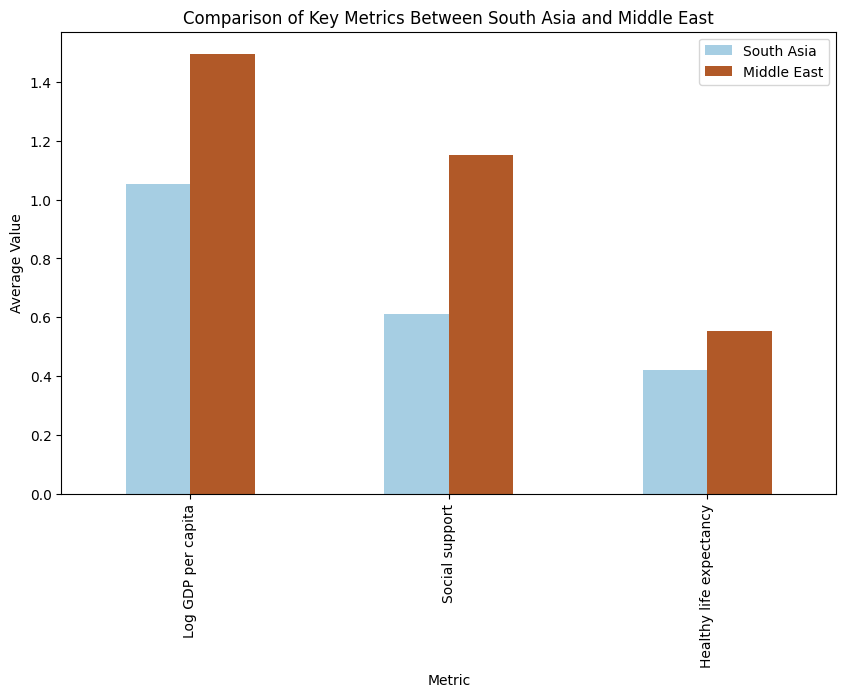

In [ ]:
key_metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_metrics = south_asia_df[key_metrics].mean()
middle_east_metrics = middle_east_df[key_metrics].mean()

comparison_df = pd.DataFrame({
    'Metric': key_metrics,
    'South Asia': south_asia_metrics.values,
    'Middle East': middle_east_metrics.values
})

comparison_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), colormap='Paired')
plt.title("Comparison of Key Metrics Between South Asia and Middle East")
plt.ylabel("Average Value")
plt.show()


4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [ ]:
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()

south_asia_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print("\nHappiness Disparity (Range and Coefficient of Variation):")
print(f"South Asia: Range={south_asia_range}, CV={south_asia_cv:.2f}")
print(f"Middle East: Range={middle_east_range}, CV={middle_east_cv:.2f}")

if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")



Happiness Disparity (Range and Coefficient of Variation):
South Asia: Range=3.4370000000000003, CV=0.30
Middle East: Range=4.634, CV=0.29
South Asia has greater variability in happiness.


5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.


Correlation Analysis:
South Asia:
{'Freedom to make life choices': 0.8005185224163315, 'Generosity': 0.874512371253192}
Middle East:
{'Freedom to make life choices': 0.8632202433827543, 'Generosity': 0.6275236536964182}


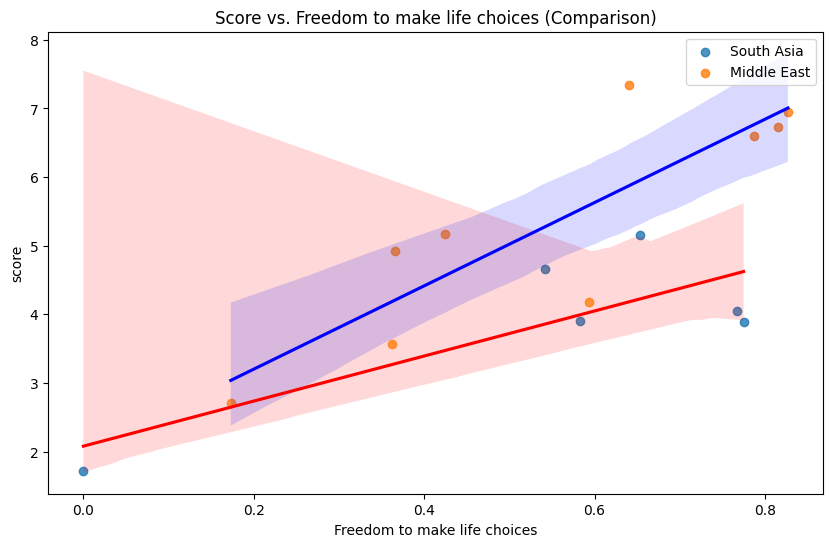

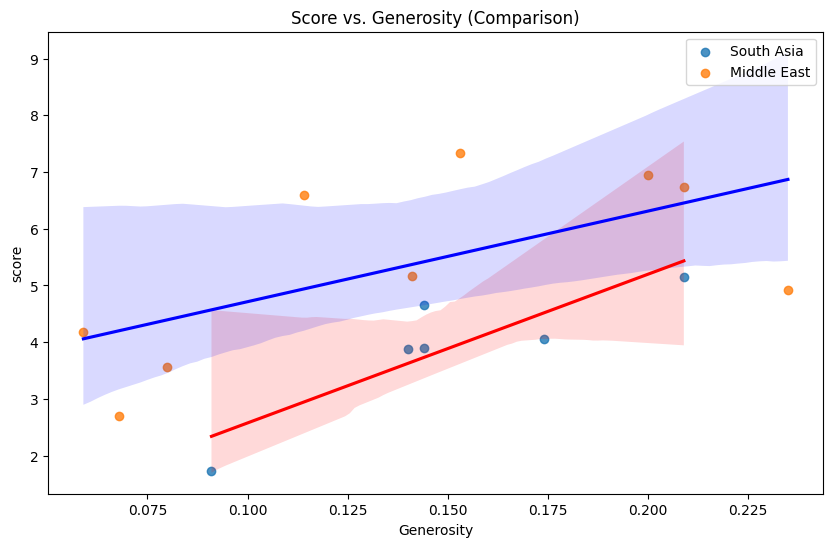

In [ ]:
metrics = ['Freedom to make life choices', 'Generosity']

south_asia_corr = {metric: south_asia_df[metric].corr(south_asia_df['score']) for metric in metrics}
middle_east_corr = {metric: middle_east_df[metric].corr(middle_east_df['score']) for metric in metrics}

print("\nCorrelation Analysis:")
print("South Asia:")
print(south_asia_corr)
print("Middle East:")
print(middle_east_corr)

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.regplot(data=south_asia_df, x=metric, y='score', line_kws={"color": "red"}, label="South Asia")
    sns.regplot(data=middle_east_df, x=metric, y='score', line_kws={"color": "blue"}, label="Middle East")
    plt.title(f"Score vs. {metric} (Comparison)")
    plt.legend()
    plt.show()


6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.


Outliers in South Asia:
    Country name  score
142  Afghanistan  1.721

Outliers in Middle East:
Empty DataFrame
Columns: [Country name, score]
Index: []


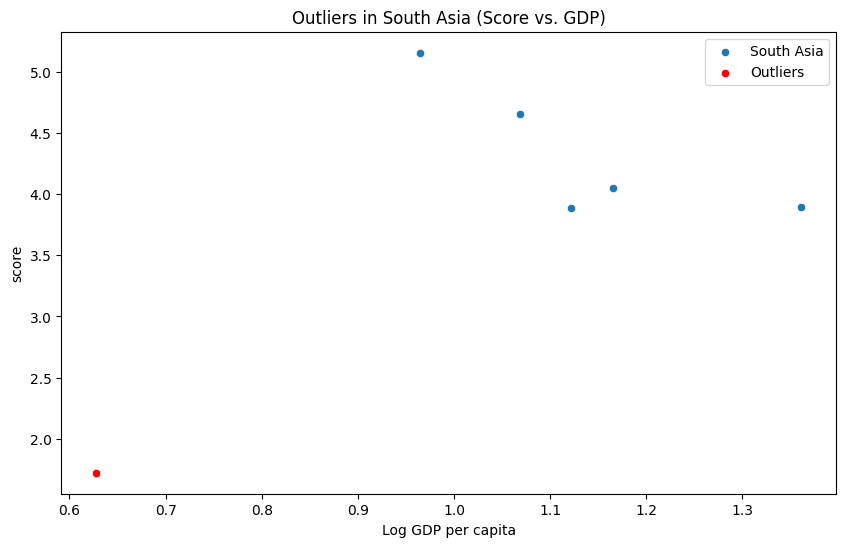

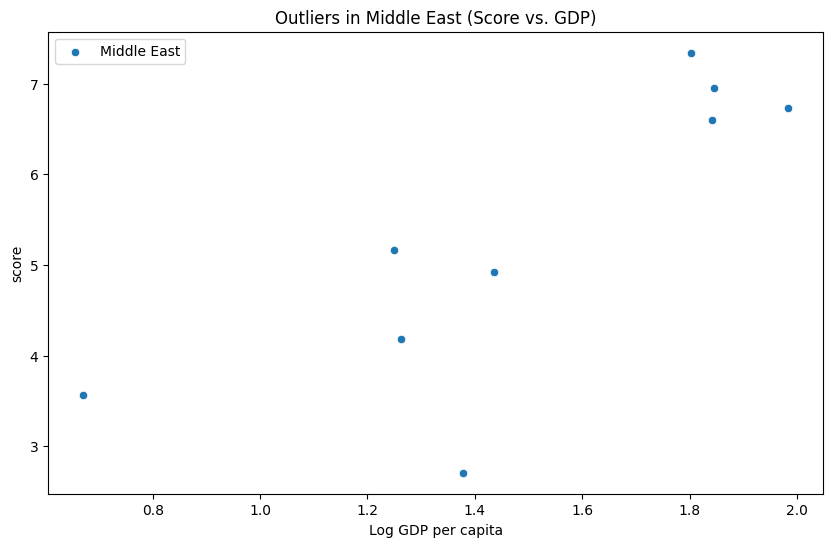

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

south_asia_outliers = detect_outliers(south_asia_df, 'score')
middle_east_outliers = detect_outliers(middle_east_df, 'score')

print("\nOutliers in South Asia:")
print(south_asia_outliers[['Country name', 'score']])

print("\nOutliers in Middle East:")
print(middle_east_outliers[['Country name', 'score']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=south_asia_df, x='Log GDP per capita', y='score', label="South Asia")
sns.scatterplot(data=south_asia_outliers, x='Log GDP per capita', y='score', color='red', label="Outliers")
plt.title("Outliers in South Asia (Score vs. GDP)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=middle_east_df, x='Log GDP per capita', y='score', label="Middle East")
sns.scatterplot(data=middle_east_outliers, x='Log GDP per capita', y='score', color='red', label="Outliers")
plt.title("Outliers in Middle East (Score vs. GDP)")
plt.legend()
plt.show()


7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.

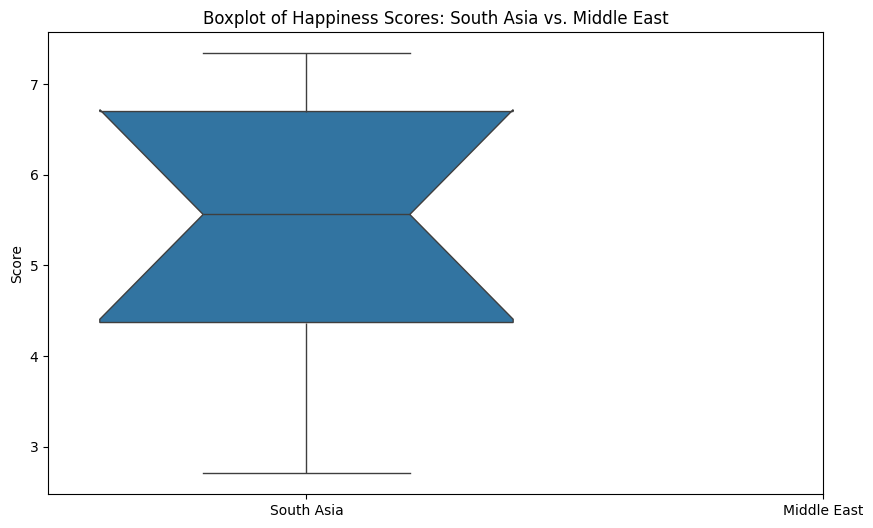

In [ ]:
# Bo
plt.figure(figsize=(10, 6))
sns.boxplot(data=[south_asia_df['score'], middle_east_df['score']], notch=True)
plt.xticks([0, 1], ['South Asia', 'Middle East'])
plt.title("Boxplot of Happiness Scores: South Asia vs. Middle East")
plt.ylabel("Score")
plt.show()
